## Introduction
Deep learning is a subset of machine learning that trains a computer to perform human-like tasks, such as speech recognition, image identification and prediction making. It improves the ability to classify, recognize, detect and describe using data.
 
## Learning objectives
* understand Neural Network concepts
* Understand how a model is trained and evaluated
* Understand the concept of **train/validation/test split** and why it's useful
* Understand the basics of Tensorflow
* Use **Tensorflow Eager** and **Keras Layers** to build a neural network archetecture

# The Linear Unit

the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

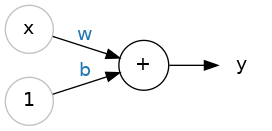

The input is **x**. Its connection to the neuron has a weight which is w. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input x, what reaches the neuron is w * x. A neural network "learns" by modifying its weights.

The **b** is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just b (since 1 * b = b). The bias enables the neuron to modify the output independently of its inputs.

The **y** is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula  `y=wx+b`

# Multiple Inputs

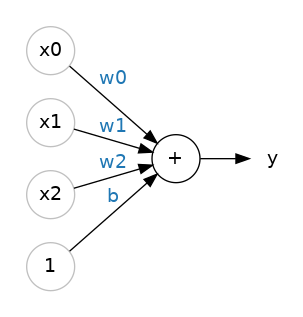

The formula for this neuron would be  `y=w0x0+w1x1+w2x2+b` . A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.


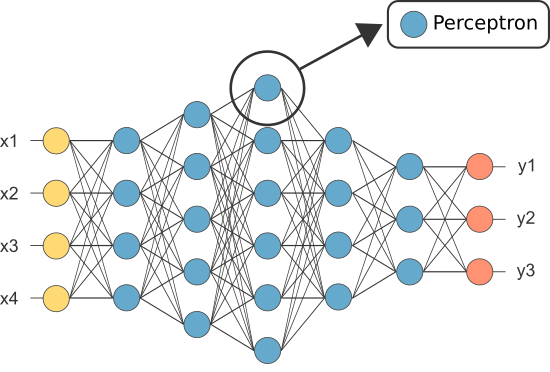

# Define the model

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a **training set**, a **validation set** and a **test set**. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on).

In [ ]:
import tensorflow as tf

#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

**Simulate some data and visualize them**

In [ ]:
def create_sine_data(n = 300):
    np.random.seed(32)
    n = 300
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x,y

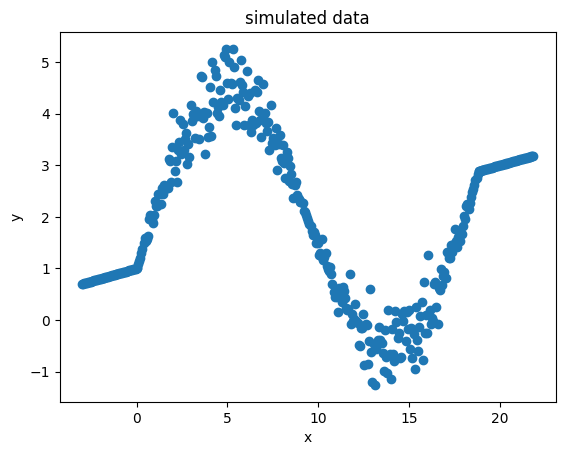

In [ ]:
## use custom function to simulate some data 
x,y = create_sine_data(n=300) #A
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

# First model: NN for the most simple linear regression
Let's use a NN without a hidden layer and with one output node to fit a linear regression model where the mean parameter of the CPD linearly depends on x, the loss function is given by the MSE.

In [ ]:
# set up a NN without hidden layer and only one output node 
# This assumes that the mean of the CPD depends linearly on x
# and the standard deviation of the CPD is constant and not modeled
model = Sequential()
model.add(Dense(1, activation='linear',batch_input_shape=(None, 1)))
model.compile(loss='mean_squared_error',optimizer="adam")

In [ ]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the first model and show the fit along with the data
# train the model  
history=model.fit(x, y, 
                  batch_size=16, 
                  epochs=1000,
                  verbose=0
                 )

In [ ]:
# evaluation of the MSE loss
model.evaluate(x,y,verbose=2)

14/14 - 0s - loss: 2.4817


2.4817116260528564

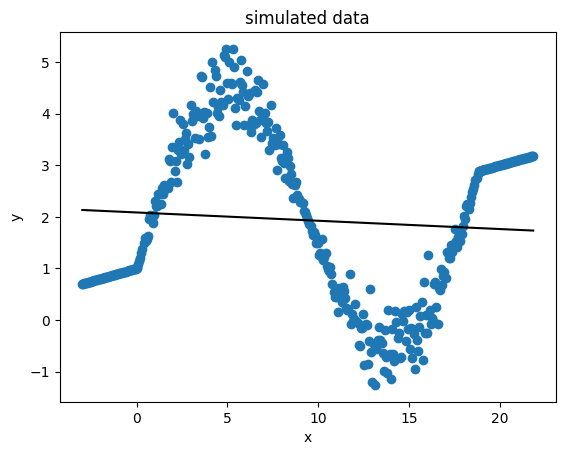

In [ ]:
# show the data along with the fit
plt.scatter(x=x,y=y,marker='o')
plt.plot(x,model.predict(x),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Activation functions



# Why use an activation function?

Activation functions are one of the most important choices to be made for the architecture of a neural network. Without an activation function, neural networks can essentially only act as a linear regression model. Since most datasets are non-linear to at least some degree, using an activation function facilitates the modeling of more complex relationships between variables, allowing a neural network to truly be a universal function approximator.

# How does an activation function work?
For each hidden layer node, the input nodes are multiplied by their current weights and then summed. As an example, consider a hidden layer node with three input nodes that might be modeled by:

`n=(w1x1)+(w2x2)+(w3x3) `

Where  x1 ,  x2 , and  x3  are input variables, and  w1 ,  w2 , and  w3  are the multiplicative weighting factors to be optimized by the neural network. Notice (as mentioned above) that this function is entirely linear. If we were to stop here, the best machine learning algorithm that the neural network could approximate is merely linear regression. Furthermore, each additional node in each new layer is still just a weighted linear combination of all previous inputs. If there is no activation function, the entire neural network could be represented by a single linear function!

The activation function takes this linear input and translates it into a nonlinear output. For example, a logistic activation function is given by:

$$
  f(x) = \frac{1}{1\ –\ e^{-n}}
$$

Where “$n$” is the value of the hidden layer node, the same as the first equation above. This transfer function allows the output to model non-linear system behavior, which most real-world problems will exhibit.

# Logistic (sigmoid)
The logistic (or sigmoid) activation function, looks like:

$$
  f(x) = \frac{1}{1\ +\ e^{-x}}
$$

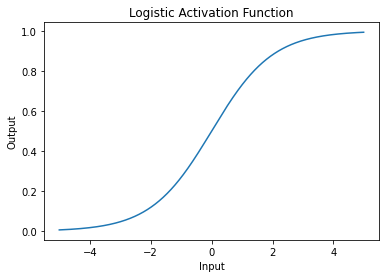

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.title('Logistic Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

# Hyperbolic Tangent
The hyperbolic tangent activation function (also known as “ tanh ”) looks like:

$$
  f(x) = (\frac{2}{1\ +\ e^{-2X}}) - 1
$$

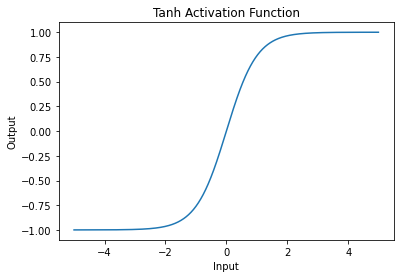

In [ ]:
x = np.arange(-5, 5, 0.01)
y = (2 / (1 + np.exp(-2*x)))-1
plt.plot(x,y)
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

# Rectified Linear Unit
Also known as ReLU, this activation function looks like

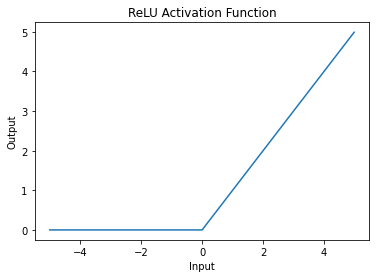

In [ ]:
x = np.arange(-5, 5, 0.01)
z = np.zeros(len(x))
y = np.maximum(z,x)
plt.plot(x,y)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

# Second model: NN for a non-linear regression model
Now, let's use a NN with three hidden layers and with one output node to fit a linear regression model where the mean parameter of the CPD can non-linearly depend on x. the loss function is given by the MSE.

In [ ]:
#Listing 4.5 A fully connected NN with 3 hidden layers to model non-linear relation ships using the MSE loss
# set up a NN with 3 hidden layers and only one output node 
# This allows that the mean of the CPD depends non-linearly on x
# and the standard deviation of the CPD is constant and not modeled
model = Sequential()
model.add(Dense(20, activation='relu',
                batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer="adam")

In [ ]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
history=model.fit(x, y, 
                  batch_size=16, 
                  epochs=1000,
                  verbose=0, 
                 )

In [ ]:
# evaluation of the MSE loss
model.evaluate(x,y,verbose=2)

14/14 - 0s - loss: 0.0765


0.07645821571350098

In [ ]:
#@title Ques { display-mode: "form" }
## use custom function to simulate some data 
x,y = create_sine_data(n=300) #A


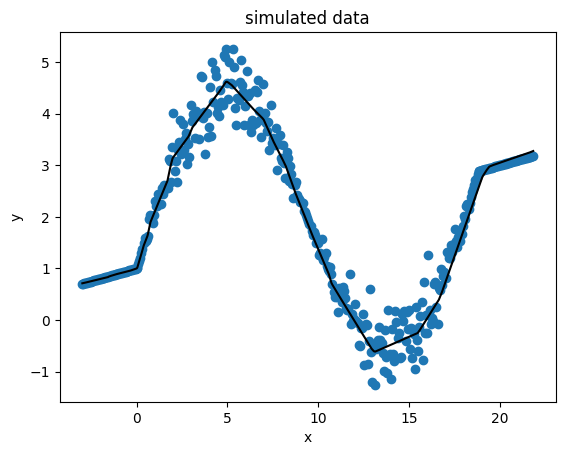

In [ ]:
# show the data along with the fit
plt.scatter(x=x,y=y,marker='o')
plt.plot(np.linspace(-3,3*2*np.pi+3,1000),model.predict(np.linspace(-3,3*2*np.pi+3,1000)),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Tensorflow
As described in Wikipedia TensorFlow is a computational framework for building machine learning models. It is the second generation system from Google Brain headed by Jeff Dean. Launched in early 2017, it has disrupted the ML world by bringing in numerous capabilities from scalability to building production ready models.

TensorFlow (TF) is an open source software library for numerical computation using the concept of Tensors. You can think of Tensors as being a generalisation of matrices to higher dimensions, or roughly equivalent to multi-dimensional arrays. Scalars are 0-dimensional tensors, vectors are 1-dimensional, standard matrices are 2-dimensional, and higher-dimensional tensors have 3 or more dimensions. You can think of dimensions as representing groups of numbers that mean the same thing. For example, for images, we often use 3-dimensional tensors where the first dimension represents the red, green, and blue color channels of the image, and the next two are the columns and rows of pixels of the image. 

**Note**: Don't be confused when people say "2-D vector" or "3-D vector", which refers to a 1-dimensional tensor that has size 2 or 3.

The major advantage of using TensorFlow is that it can automatically derive the gradients of many mathematical expressions involving tensors. It achieves this through a process called "automatic differentiation". Tensorflow also supports multiple "kernels", allowing you to easily run your code on normal processors (CPUs), graphics cards (GPUs) and other more exotic hardware accelerators like Google's Tensor Processing Units (TPUs)

Tensorflow actually provides **two modes of operation**, the first, called "graph mode", builds a computation graph upfront and then feeds data into the graph. By building the graph upfront, Tensorflow can apply optimisations to the graph that allow it to extract peak performance from the hardware you're running on. You will have encountered this mode if you used Tensorflow before or attended the Indaba last year! The second mode, called ["Eager-mode"](https://www.tensorflow.org/guide/eager), is a lot newer and evaluates Tensor operations imperatively (in the order you write them), similar to NumPy and PyTorch. Eager-mode is slightly less performant but a lot more intuitive, especially if you've never used a "define-and-run" programming style (like graph mode) before, and is therefore the mode we will use in these practicals. 

In [ ]:
#@title Imports (RUN ME!) { display-mode: "form" }

#!pip install tensorflow-gpu==2.0.0-beta0 > /dev/null 2>&1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

For statrers, we can define a constant which is a tensor whose value cannot be changed at all. It can take many shapes and dimentions as the examples below show.

We can also declare variable tensors which values change. Their declaration is abit different but the code below shows the difference between the two:

In [ ]:
#for declaring constants we use the ft.constant function
x1 = tf.constant(3)            #shape ()
x2 = tf.constant([3, 5, 7])    #shape (3,)
#we can use tf.stack to create higher dimentinal matricies
x3 = tf.stack([x2, x2])        #shape (2, 3)

#for declaring a variable we use the function tf.get_variable and we manuplate them using the tf.variable class


my_var = tf.compat.v1.get_variable("my_var", [1, 2, 3])

init_op = tf.compat.v1.global_variables_initializer()
print (x1)
print(x2)
print(x3) 
print(my_var)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([3 5 7], shape=(3,), dtype=int32)
tf.Tensor(
[[3 5 7]
 [3 5 7]], shape=(2, 3), dtype=int32)
<tf.Variable 'my_var:0' shape=(1, 2, 3) dtype=float32, numpy=
array([[[0.70947444, 0.8270644 , 0.11530066],
        [0.36901808, 0.0780617 , 0.54646766]]], dtype=float32)>


As you might have noticed, running the above code results in printing tensor abstract but not the values themselves. This is because a Tensorflow code is just an abstract representation of what will be run in the Tensorflow session. A session encapsulates state of Tensorflow runtime and runs Tensorflow operations. Tesnorflow represents the written code in an unserlying graph. Take the following code, it is represented by the grave underneath it.

In [ ]:
# sessions = tf.compat.v1.Session()
x = tf.constant([1, 2, 3], name = "x")
y = tf.constant([4, 5, 6], name = "y")
z1 = tf.add(x, y, name = "z1")
z2 = x * y
z3 = z2- z1

![alt text](https://miro.medium.com/max/314/1*B9L6Y6lz1NzFFjyC1YMeYA.png)

when we run the session thats when the value are inputed and we can get the values of the Tensors.

In [ ]:
# print(sessions.run(z3))
# sessions.close()
print(z3)

tf.Tensor([-1  3  9], shape=(3,), dtype=int32)


### Basic TensorFlow operations
#### Addition and Subtraction

In [ ]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 + a2 # (tf.add(a1, a2) also works. TensorFlow supports primitive operators)

# with tf.Session() as session:
#     print(session.run(a3))
print(a3)

# Result [4, 6, 8]

a4 = a1 - a2
# with tf.Session() as session:
#     print(session.run(a4))
print(a4)

# Result [-2, -2, -2]

#### Multiplication and Division

In [ ]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 * a2 # (tf.mul(a1, a2) also works. TensorFlow supports primitive operators)

# with tf.Session() as session:
#     print(session.run(a3))
print(a3)

# Result [3, 8, 15]

a4 = a1/a2
# with tf.Session() as session:
#     print(a4.eval())  # eval() can be used instead of session.run() to compute the results of a particular variable.

print(a4)

# Result [0.34, 0.5, 0.6]

#### Reshape

In [ ]:
a1 = tf.constant(([3, 5, 7],
                 [4, 6, 8]))  # Shape is (2, 3)
a2 = tf.reshape(a1, [3, 2])

# with tf.Session() as sess:
#     print(a2.eval())

print(a2)
    
# Result[[3, 5], [7, 4], [6, 8]]